## Objetivo:

Aplicar técnicas de Aprendizado de Máquina e Inteligência Artificial na análise de voos e no controle de drones.

## Instruções: 

* Datasets: <code>parametros_gerais.csv</code> e <code>sensores_voo.csv</code>.

In [1]:
# Conecta ao Google Drive para carregar os dados CSV.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Bibliotecas
## Geral
import pandas as pd  # Trabalhar com tabelas
import numpy as np # Trabalhar com números
from sklearn.model_selection import train_test_split # Separação de dados
import statistics
from sklearn.model_selection import GridSearchCV # Ajuste de hiperparâmetros

## Gráficos
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import plot_tree 
from matplotlib import colors
import scipy.cluster.hierarchy as sch   # Dendograma

## Regressão
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR                     
from sklearn.tree import DecisionTreeRegressor

## Classificação
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

## Aprendizado de Máquina - Redução de dimensionalidade
from sklearn.decomposition import PCA, KernelPCA   
from sklearn.manifold import TSNE, Isomap 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Escalonador
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Lógica Fuzzy
!pip install -U scikit-fuzzy # Para instalar biblioteca de Lógica Fuzzy
import skfuzzy as fz
from skfuzzy import control as ctrl

## Análise de desempenho
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, plot_confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score, silhouette_score, cohen_kappa_score, roc_auc_score, roc_curve, make_scorer, accuracy_score, adjusted_rand_score, recall_score # Métricas de desempenho
from scipy import spatial # Calcular similaridade do cosseno
from scipy.stats import pearsonr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=220b390bee304f29a9000b2e23ff3ef7ae071f5a4b75d7c91cc760e77ef4c9df
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


--------------------------------------
# Parte A -  Parâmetros Gerais de múltiplos voos

Dataset (<code>parametros_gerais.csv</code>):

- **flight:** número do voo;
- **speed:** velocidade média durante o voo (m/s)
- **payload:** peso da carga transportada (g)
- **altitude:** altitude de cruzeiro predefinida (m)
- **date:** data do voo
- **local_time:** horário em que o voo ocorreu 
- **total_energy:** energia total consumida da bateria (J)
- **mean_wind_speed:** velocidade média do vento (m/s)
- **flight_duration:** tempo total de duração do voo (s)

## Análise Exploratória:

### Análise inicial

In [3]:
# Carregando dados do dataset 'parametros_gerais.csv'
dados_parametros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GS2/parametros_gerais.csv', sep=',') 

In [4]:
dados_parametros.head()

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.7
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.2
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.1
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.0
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.0


In [5]:
# dados_parametros = dados_parametros.drop(columns='flight', axis=1) # Acts like index.

In [6]:
dados_parametros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight           207 non-null    int64  
 1   speed            207 non-null    float64
 2   payload          207 non-null    float64
 3   altitude         207 non-null    int64  
 4   date             207 non-null    object 
 5   local_time       207 non-null    object 
 6   route            207 non-null    object 
 7   total_energy     207 non-null    int64  
 8   mean_wind_speed  207 non-null    float64
 9   flight_duration  207 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 16.3+ KB


### Distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d769f3a50>,
      dtype=object)

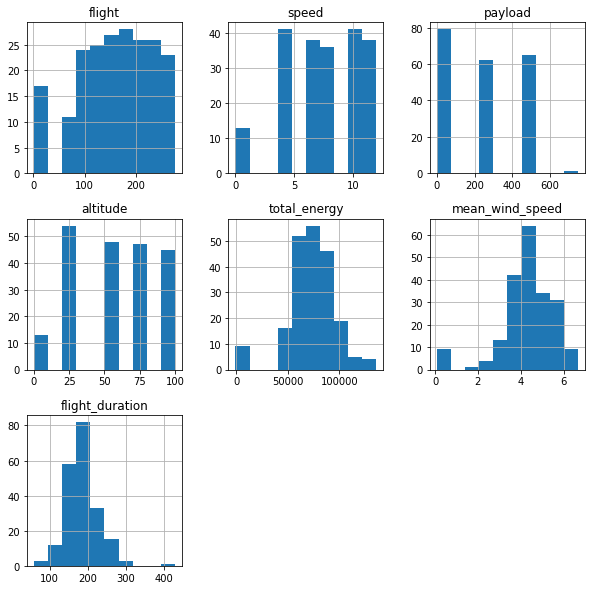

In [7]:
# Histograma dos dados.
dados_parametros.hist(figsize=(10,10))

In [8]:
# Tabulação das estatísticas gerais dos dados, tais como média, desvio padrão, valor minimo/máximo etc.
dados_parametros.describe()

,flight,speed,payload,altitude,total_energy,mean_wind_speed,flight_duration
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,160.207729,7.468599,235.507246,56.942029,73019.062802,4.303913,185.402754
std,71.628087,3.380086,211.404477,30.923120,22998.812509,1.245148,44.249007
min,1.000000,0.000000,0.000000,0.000000,-575.000000,0.090000,58.590000
25%,111.500000,4.000000,0.000000,25.000000,60823.000000,3.840000,157.300000
50%,166.000000,8.000000,250.000000,50.000000,72511.000000,4.320000,181.810000
75%,217.500000,10.000000,500.000000,75.000000,87013.000000,5.050000,207.395000
max,277.000000,12.000000,750.000000,100.000000,135888.000000,6.670000,428.290000


### Relação entre os dados (visual e numérica)

In [9]:
# Correlação númerica. 
dados_parametros.corr()

,flight,speed,payload,altitude,total_energy,mean_wind_speed,flight_duration
flight,1.000000,-0.108255,0.111361,0.013317,-0.021601,-0.333320,0.076185
speed,-0.108255,1.000000,0.159006,0.286444,-0.025561,0.599486,-0.207129
payload,0.111361,0.159006,1.000000,0.119981,0.413109,0.166467,0.104696
altitude,0.013317,0.286444,0.119981,1.000000,0.665690,0.353376,0.549500
total_energy,-0.021601,-0.025561,0.413109,0.665690,1.000000,0.393185,0.805662
mean_wind_speed,-0.333320,0.599486,0.166467,0.353376,0.393185,1.000000,0.104324
flight_duration,0.076185,-0.207129,0.104696,0.549500,0.805662,0.104324,1.000000


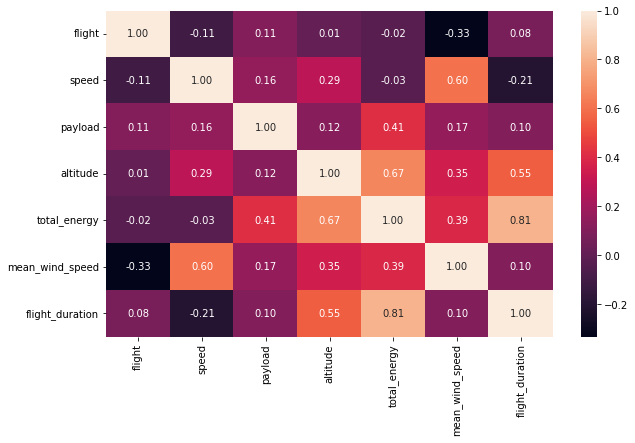

In [10]:
# Correlação visual.
plt.figure(figsize=(10,6))
sns.heatmap(dados_parametros.corr(method = 'pearson'), annot=True, fmt=".2f")

Pode-se observar que os dados com maior correlação são 'total_energy' e 'flight_duration' (correlação de 0.81), 'total_energy' e 'altitude' (correlação de 0.67) e 'mean_wind_speed' e 'speed' (correlação de 0.60). 

### Quantidade de rotas existentes

In [11]:
# Contagem dos dados a partir do agrupamento do tipo de rota ('route').
# Pode-se observar que tem 2 rotas: 'R1' e 'non R1'.
dados_parametros.groupby('route').count()

,flight,speed,payload,altitude,date,local_time,total_energy,mean_wind_speed,flight_duration
route,,,,,,,,,
R1,182,182,182,182,182,182,182,182,182
non R1,25,25,25,25,25,25,25,25,25


### Tipos de cargas existentes

In [12]:
# Contagem dos dados a partir do agrupamento do tipo de carga ('payload').
# Pode-se observar que tem 4 cargas, de peso (em Kg): 0, 250, 500 e 750.
dados_parametros.groupby('payload').count()

,flight,speed,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
payload,,,,,,,,,
0.0,79,79,79,79,79,79,79,79,79
250.0,62,62,62,62,62,62,62,62,62
500.0,65,65,65,65,65,65,65,65,65
750.0,1,1,1,1,1,1,1,1,1


### Altitude de voo mais frequente

In [13]:
dados_altitude = dados_parametros['altitude'].value_counts().reset_index() # Filtra os dados com base no atributo 'altitude', e realiza uma contagem
# de valores únicos em ordem descendente.
dados_altitude.columns = ['Altitude', 'Frequência'] # Cria-se um index para apresentação dos dados.
dados_altitude 

,Altitude,Frequência
0,25,54
1,50,48
2,75,47
3,100,45
4,0,9
5,3,4


Conclui-se que a altitude de voo mais frequente são os de 25 (metros), com uma frequência de 54 repetições.

### Pior condição de vento enfrentada e em qual dia


In [14]:
max_mean_wind_speed = dados_parametros['mean_wind_speed'].max() # Filtra pela maior média da velocidade do vento (max_mean_wind_speed).
row_max_mean_wind_speed = dados_parametros.loc[dados_parametros['mean_wind_speed'] == max_mean_wind_speed] # Localiza a linha com os dados da pior
# condição de vento.
row_max_mean_wind_speed

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
69,129,12.0,500.0,75,2019-06-25,11:36,R1,89170,6.67,188.3


In [15]:
print(f"O dia com a pior condição de vento '{max_mean_wind_speed} m/s' ocorreu em '{row_max_mean_wind_speed['date'].to_string(index=False)}'.")

O dia com a pior condição de vento '6.67 m/s' ocorreu em '2019-06-25'.


### Média e desvio padrão de todos os dados numéricos.

In [16]:
# Gera-se estatísticas descritivas dos dados, filtrado por 'média' (mean) e 'desvio padrão' (std).
dados_parametros.describe().loc[['mean','std']]

,flight,speed,payload,altitude,total_energy,mean_wind_speed,flight_duration
mean,160.207729,7.468599,235.507246,56.942029,73019.062802,4.303913,185.402754
std,71.628087,3.380086,211.404477,30.923120,22998.812509,1.245148,44.249007


### Média e desvio padrão de todos os dados numéricos agrupados por carga transportada.

In [17]:
# Gera-se estatísticas descritivas dos dados agrupados pelo 'tipo de carga' (payload), filtrados para 'média' (mean) e 'desvio padrão' (std).
dados_parametros.groupby('payload').describe().loc[:, (slice(None), ['mean','std'])] 
# Só temos um item com a carga de 750kg, logo std = NaN.

flight                speed             altitude             \
               mean        std      mean       std       mean        std   
payload                                                                    
0.0      152.177215  77.281165  6.658228  3.970681  50.468354  34.098964   
250.0    156.903226  72.394799  7.967742  2.862807  62.500000  27.813047   
500.0    174.415385  61.918518  8.030769  2.861213  60.000000  28.572824   
750.0     76.000000        NaN  4.000000       NaN  25.000000        NaN   

         total_energy               mean_wind_speed           flight_duration  \
                 mean           std            mean       std            mean   
payload                                                                         
0.0      61047.620253  24943.515536        4.016835  1.709701      179.286076   
250.0    77155.322581  17296.967595        4.447097  0.851312      188.908065   
500.0    83315.738462  18753.318566        4.522000  0.751655      188.602615   
750.0    93031.000000           NaN        3.930000       NaN      243.300000   

                    
               std  
payload             
0.0      47.439108  
250.0    48.915693  
500.0    34.029771  
750.0          NaN

## Modelo para predizer o total de energia consumida em função dos parâmetros de voo. 

In [18]:
# Visualização dos 5 primeiros itens. 
dados_parametros.head()

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.7
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.2
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.1
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.0
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.0


In [19]:
# Escolhe-se as colunas preditivas e alvo.
x = dados_parametros.drop(columns = ['date', 'local_time', 'route', 'total_energy']) # Colunas descritivas.
y = dados_parametros['total_energy'] # Valor alvo.

# Divide-se conjunto de treinamento (80%) e conjunto de teste (20%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
# Escalonamento
scaler = StandardScaler() # Cria-se o objeto de escalonamento.
scaler.fit(x_train) # Passa-se os dados de treinamento para encontrar a escala.

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [21]:
# Regressor.
dtr = DecisionTreeRegressor() # Cria-se o objeto do regressor (não mudamos nenhum hiperpârametro)

dtr.fit(x_train_escalonado,y_train) # Treina-se o regressor passando apenas o conjunto de dados de treinamento 

y_predicoes = dtr.predict(x_test_escalonado) # Predize-se os dados de teste escalonados, com base no regressor treinado anteriormente.

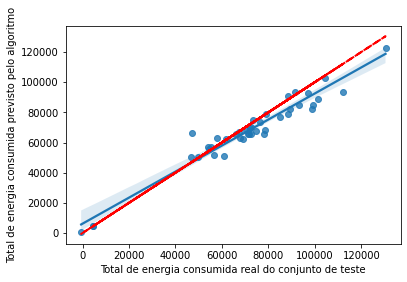

In [22]:
# Exibe-se um gráfico plotado com os dados de teste e os dados previstos.
ax = sns.regplot(x=y_test, y=y_predicoes)
ax.set_xlabel('Total de energia consumida real do conjunto de teste')
ax.set_ylabel('Total de energia consumida previsto pelo algoritmo')
plt.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto')

### Avaliação do modelo

In [23]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito.
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado.
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito.
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado.
print('MSE: ', MSE)

R2 = r2_score(y_true = y_test,      # Gabarito.
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado.
print('R2: ', R2)  # Quanto mais próximos de 1, melhor.

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor. O algoritmo treinado obteu uma correlação dos dados de teste com dados previstos de 97%.

MAE:  5623.857142857143
MSE:  57221865.190476194
R2:  0.9165026197344865
ρ: 0.9703068929701099


O algoritmo treinado teve um desempenho acima de 91% na métrica R2. 

## Modelo para classificar a rota (route) de voo apenas com os parâmetros gerais com recall precisa estar acima de 90%.

In [24]:
# Visualização dos 5 primeiros itens. 
dados_parametros.head()

,flight,speed,payload,altitude,date,local_time,route,total_energy,mean_wind_speed,flight_duration
0,1,4.0,0.0,25,2019-04-07,10:13,non R1,78473,3.90,200.7
1,2,4.0,0.0,50,2019-04-07,10:23,non R1,91363,3.52,271.2
2,3,6.0,0.0,25,2019-04-07,10:33,non R1,61487,4.58,180.1
3,4,8.0,0.0,25,2019-04-07,10:48,non R1,52915,4.60,171.0
4,5,4.0,0.0,25,2019-04-07,11:05,non R1,68589,3.33,217.0


In [25]:
# Escolhendo as colunas preditivas e alvo.
x = dados_parametros.drop(columns = ['route', 'date', 'local_time']) # Colunas descritivas. 
y = dados_parametros['route'] # Classe alvo.

# Divide-se conjunto de treinamento (80%) e conjunto de teste (20%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y) # O stratify mantem a mesma proporção 
# de exemplos para cada classe.

In [26]:
# Instanciando o escalonador.
scaler = MinMaxScaler() 

# Treinando o escalonador.
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados.
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
# Criando-se o classificador. 
rfc = RandomForestClassifier(bootstrap= True,
                             max_depth= 80, 
                             max_features= 3, 
                             min_samples_leaf= 5, 
                             min_samples_split= 10, 
                             n_estimators= 100)

rfc.fit(x_train_scaled, y_train) # Treina-se o classificador passando apenas o conjunto de dados de treinamento escalonados.
y_predicoes = rfc.predict(x_test_scaled) # Prediz as classes.

<Figure size 1080x360 with 0 Axes>

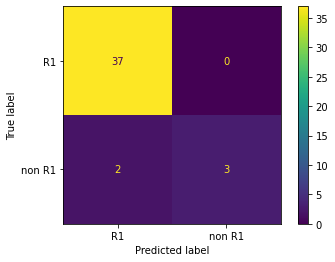

In [28]:
# Gera-se matriz de confusão.
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['R1', 'non R1'])

# Exibe uma figura com a matriz de confusão.
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['R1', 'non R1'])
disp.plot(values_format='d') 

In [29]:
# Relatório do desempenho do classificador.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

          R1       0.95      1.00      0.97        37
      non R1       1.00      0.60      0.75         5

    accuracy                           0.95        42
   macro avg       0.97      0.80      0.86        42
weighted avg       0.95      0.95      0.95        42



In [30]:
# Métrica do Coeficiente Kappa de Cohen
print('Coeficiente Kappa de Cohen: ', cohen_kappa_score(y_test, y_predicoes))

# Acurácia
print('Acurácia: ', accuracy_score(y_test, y_predicoes))

# Recall
print('Recall score: ', recall_score(y_test, y_predicoes, average='micro'))

Coeficiente Kappa de Cohen:  0.7254901960784315
Acurácia:  0.9523809523809523
Recall score:  0.9523809523809523


Conclui-se que o algoritmo teve um recall de 95%. 

-----------------------------------------------
# Parte B - Dados de Voo

Dados de sensores de voo (<code>sensores_voo.csv</code>).

## Quantidade de voos

In [1]:
# Carregando dados do dataset 'sensores_voo.csv'
dados_voo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GS2/sensores_voo.csv', sep=',') 

NameError: name 'pd' is not defined

In [32]:
# Visualização dos 5 primeiros itens. 
dados_voo.head()

,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,...,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z
0,0.0,0.1,12.0,24.222174,0.087470,-79.781396,40.458047,269.332402,0.001772,0.005610,...,0.966784,-0.012826,-0.005645,0.010475,-0.000825,0.001407,0.006815,0.004258,-0.120405,-9.811137
1,0.2,0.1,3.0,24.227180,0.095421,-79.781396,40.458047,269.332056,0.001768,0.005607,...,0.966783,-0.015410,-0.001636,0.010137,0.000001,-0.002862,0.002034,0.006175,-0.116397,-9.810392
2,0.3,0.1,352.0,24.225929,0.095421,-79.781396,40.458047,269.333081,0.001768,0.005607,...,0.966783,-0.016514,-0.001822,0.009981,-0.000007,-0.001486,-0.000874,0.002696,-0.128592,-9.809440
3,0.5,0.1,354.0,24.224678,0.095421,-79.781396,40.458047,269.334648,0.001775,0.005614,...,0.966785,-0.007775,-0.005263,0.015091,0.001255,-0.000347,0.002443,0.002024,-0.128271,-9.810159
4,0.6,0.1,359.0,24.210905,0.079518,-79.781396,40.458047,269.336178,0.001775,0.005614,...,0.966785,-0.009060,-0.005174,0.015142,-0.002383,0.000182,-0.006425,0.008271,-0.119890,-9.812125


In [33]:
dados_voo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   2967 non-null   float64
 1   wind_speed             2967 non-null   float64
 2   wind_angle             2967 non-null   float64
 3   battery_voltage        2967 non-null   float64
 4   battery_current        2967 non-null   float64
 5   position_x             2967 non-null   float64
 6   position_y             2967 non-null   float64
 7   position_z             2967 non-null   float64
 8   orientation_x          2967 non-null   float64
 9   orientation_y          2967 non-null   float64
 10  orientation_z          2967 non-null   float64
 11  orientation_w          2967 non-null   float64
 12  velocity_x             2967 non-null   float64
 13  velocity_y             2967 non-null   float64
 14  velocity_z             2967 non-null   float64
 15  angu

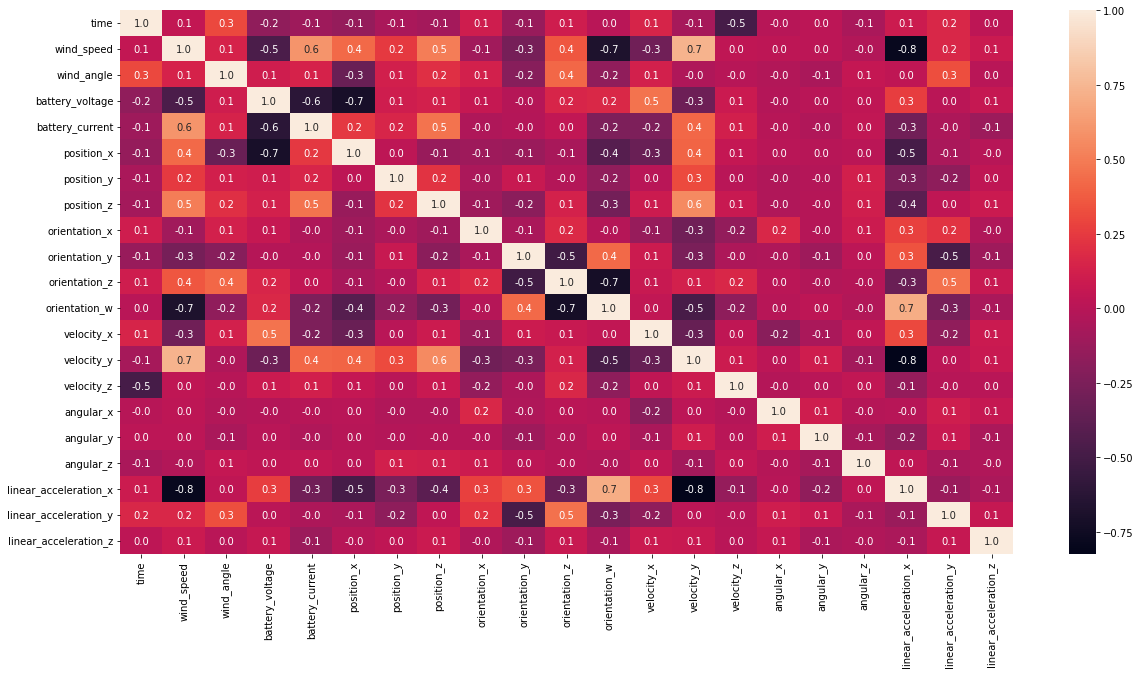

In [34]:
# Correlação
plt.figure(figsize=(20,10))
sns.heatmap(dados_voo.corr(method = 'pearson'),
            annot=True, fmt=".1f");

In [35]:
# Relação das features. - Como há-se muitos dados para serem plotados, recomenda-se comentar essa célula. 
##sns.pairplot(dados_voo)
##plt.show()

### Dispersões de posição x e y, e time e z, para validar os grupos encontrados.

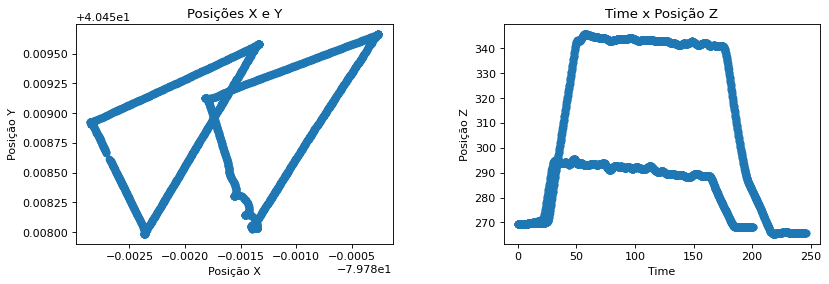

In [36]:
# Gráficos de dispersão para análise inicial.
fig = plt.figure(figsize=(12, 8), dpi=80)

# Gráfico 1: Posição X por Posição Y
plt.subplot(2,2,1)
plt.scatter(x=dados_voo['position_x'], y=dados_voo['position_y'])
plt.title('Posições X e Y')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')

# Gráfico 2: Time por Posição Z
plt.subplot(2,2,2)
plt.scatter(x=dados_voo['time'], y=dados_voo['position_z'])
plt.title('Time x Posição Z')
plt.xlabel('Time')
plt.ylabel('Posição Z')

plt.subplots_adjust(wspace = 0.35)

Observando os gráficos expostos, à primeira vista podemos identificar 2 voos. 

Aplicaremos algumas técnicas de agrupamento utilizando esses voos como paramêtro de cluster/componente. 

In [37]:
# Criando o escalonador.
sc = StandardScaler()
X_scaled = sc.fit_transform(dados_voo[['position_x', 'position_y', 'position_z', 'time']]) # Escalona os dados de posição (position) X, Y e Z, e tempo 
# (time).

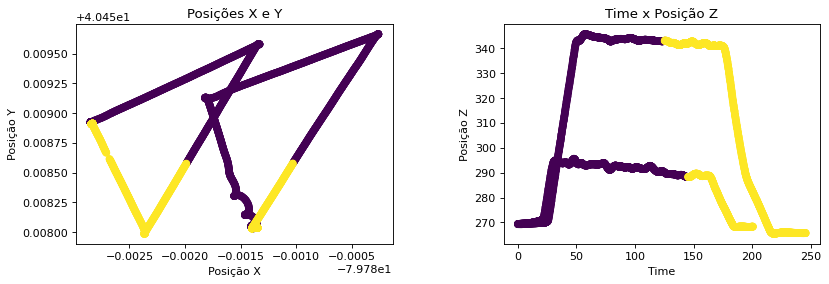

In [38]:
# Definindo o modelo de clusterizacao K-MEANS com 2 clusters.
kmeans = KMeans(n_clusters=2,random_state=42)

#Implementando o K-Means nos dados.
kmeans.fit(X_scaled)

#Salvando os rótulos dos clusters para cada exemplo.
kmeans_labels = kmeans.predict(X_scaled)

# Cria-se uma coluna para identificação dos voos.
dados_voo['voo_km'] = kmeans_labels

# Gráficos de dispersão pintados pela coluna 'voo_km'.
fig = plt.figure(figsize=(12, 8), dpi=80)

# Gráfico 1: Posição X por Posição Y
plt.subplot(2,2,1)
plt.scatter(x=dados_voo['position_x'], y=dados_voo['position_y'], c=dados_voo['voo_km'])
plt.title('Posições X e Y')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')

# Gráfico 2: Time por Posição Z
plt.subplot(2,2,2)
plt.scatter(x=dados_voo['time'], y=dados_voo['position_z'], c=dados_voo['voo_km'])
plt.title('Time x Posição Z')
plt.xlabel('Time')
plt.ylabel('Posição Z')

plt.subplots_adjust(wspace = 0.35)

### Coluna na tabela de dados que permite a fácil identificação dos voos.

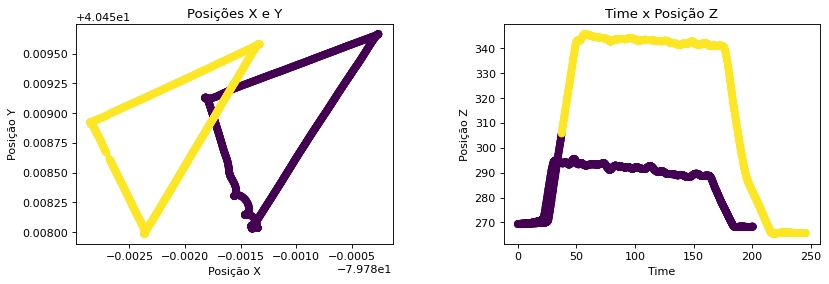

In [39]:
# Definindo o modelo de clusterizacao Gaussian Mixture com 2 componentes.
gm = GaussianMixture(n_components=2, random_state=42)

#Implementando o K-Means nos dados.
gm.fit(X_scaled)

gm_labels = gm.predict(X_scaled)

# Cria-se uma coluna para identificação dos voos.
dados_voo['voo_gm'] = gm_labels

# Gráficos de dispersão pintados pela coluna 'voo_gm'.
fig = plt.figure(figsize=(12, 8), dpi=80)

# Gráfico 1: Posição X por Posição Y
plt.subplot(2,2,1)
plt.scatter(x=dados_voo['position_x'], y=dados_voo['position_y'], c=dados_voo['voo_gm'])
plt.title('Posições X e Y')
plt.xlabel('Posição X')
plt.ylabel('Posição Y')

# Gráfico 2: Time por Posição Z
plt.subplot(2,2,2)
plt.scatter(x=dados_voo['time'], y=dados_voo['position_z'], c=dados_voo['voo_gm'])
plt.title('Time x Posição Z')
plt.xlabel('Time')
plt.ylabel('Posição Z')

plt.subplots_adjust(wspace = 0.35)

In [40]:
# Atestando desempenho dos classificadores.
km_score = silhouette_score(X_scaled, kmeans_labels)
gm_score = silhouette_score(X_scaled, gm_labels)
comparation = adjusted_rand_score(kmeans_labels, gm_labels)

print(f'KMeans: {km_score}\nGaussian Mixture: {gm_score}\nComparação dos modelos: {comparation}')

KMeans: 0.281702488842654
Gaussian Mixture: 0.28593567031866307
Comparação dos modelos: 0.1259537626926744


O modelo Gaussian Mixture teve um desempenho ligeiramente melhor que o modelo K-Means, tanto em números absolutos, quanto através do gráfico de dispersão.

Logo, conclui-se que, diante do exposto, será utilizada a coluna 'voo_gm' gerada pelo modelo Gaussian Mixture nos próximos itens.

In [41]:
# Estatisticas gerais dos dados agrupadas pelo voo (0 ou 1). 
dados_voo.groupby('voo_gm').describe()

time                                                                 \
         count        mean        std   min      25%      50%      75%    max   
voo_gm                                                                          
0       1588.0   87.544868  61.135749   0.0  29.7075   81.655  141.225  200.7   
1       1379.0  141.424699  60.372855  37.4  89.1500  140.900  194.050  245.8   

       wind_speed            ... linear_acceleration_z            voo_km  \
            count      mean  ...                   75%       max   count   
voo_gm                       ...                                           
0          1588.0  3.506675  ...             -9.688127 -6.908917  1588.0   
1          1379.0  3.762364  ...             -9.678367 -7.509952  1379.0   

                                                     
            mean       std  min  25%  50%  75%  max  
voo_gm                                               
0       0.232997  0.422874  0.0  0.0  0.0  0.0  1.0  
1       0.575054  0.494514  0.0  0.0  1.0  1.0  1.0  

[2 rows x 176 columns]

## Gráfico com 3 subplots. Cada subplot é uma redução de dimensionalidade (usando o PCA) em função do tempo. O gráfico é colorido pela coluna de voo encontrada anteriormente.


(a) Posição x, y e z para uma nova variável *r*. Plot de r em função de time.

(b) Velocidade x, y e z para uma nova variável *v*. Plot de v em função de time.

(c) Aceleração x, y e z para uma nova variável *a*. Plot de a em função de time.

In [42]:
scaler = MinMaxScaler() # Escalonador
pca = PCA(n_components=1) # Queremos 1 componente apenas de cada feature (posição, velocidade e aceleração) em X, Y e Z, para uma nova váriavel 
# qualquer ('r', 'v' e 'a', respectivamente).

In [43]:
# (a)
P_scaled = scaler.fit_transform(dados_voo[['position_x', 'position_y', 'position_z']])
r = pca.fit_transform(P_scaled) 

# (b)
V_scaled = scaler.fit_transform(dados_voo[['velocity_x', 'velocity_y', 'velocity_z']])
v = pca.fit_transform(V_scaled) 

# (c)
A_scaled = scaler.fit_transform(dados_voo[['linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z']])
a = pca.fit_transform(A_scaled) 

In [44]:
# Cria-se novas colunas com os valores encontrados pela redução de dimensionalidade aplicada em cada uma das features (posição, velocidade e aceleração).
dados_voo['posicao'] = r.reshape(-1)
dados_voo['velocidade'] = v.reshape(-1)
dados_voo['aceleracao'] = a.reshape(-1)

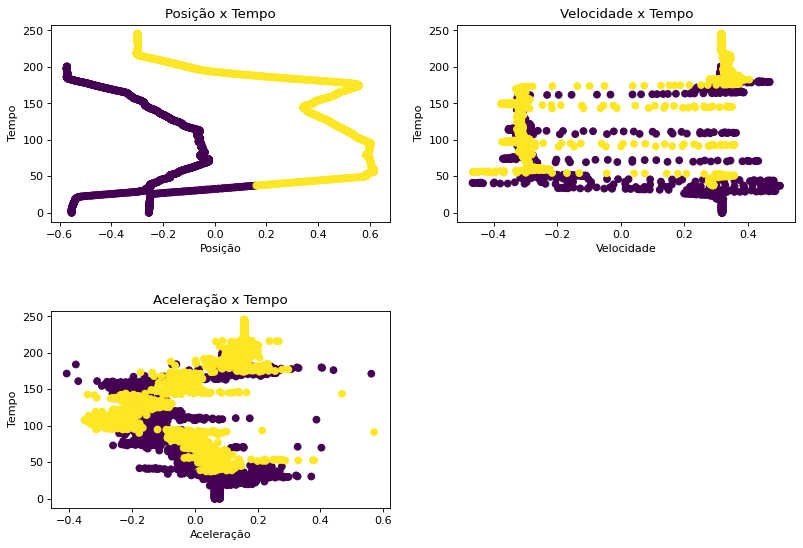

In [45]:
# Gráficos pintados pela coluna 'voo_gm'.
fig = plt.figure(figsize=(12, 8), dpi=80)

# Gráfico 1: Posição em função do tempo.
plt.subplot(2,2,1)
plt.scatter(x=r.reshape(-1), y=dados_voo['time'], c=dados_voo['voo_gm'])
plt.title('Posição x Tempo')
plt.xlabel('Posição')
plt.ylabel('Tempo')

# Gráfico 2: Velocidade em função do tempo.
plt.subplot(2,2,2)
plt.scatter(x=v.reshape(-1), y=dados_voo['time'], c=dados_voo['voo_gm'])
plt.title('Velocidade x Tempo')
plt.xlabel('Velocidade')
plt.ylabel('Tempo')

# Gráfico 3: Aceleração em função do tempo.
plt.subplot(2,2,3)
plt.scatter(x=a.reshape(-1), y=dados_voo['time'], c=dados_voo['voo_gm'])
plt.title('Aceleração x Tempo')
plt.xlabel('Aceleração')
plt.ylabel('Tempo')

plt.subplots_adjust(hspace = 0.45)

## Sistema de Lógica Fuzzy para controlar a aceleração do drone. 

**Variáveis**:
- Altitude (alt): baixa, média, alta.
- Velocidade do vento (vel_vent): fraco, forte.
- Velocidade atual (vel): baixa, média, alta.
- Aceleração (a_fuzzy): desacelerar, nula, acelerar.


**Regras**:
- Se estiver alto e ventando forte e a velocidade atual for baixa, acelere;
- Se estiver baixo e a velocidade atual for alta, desacelere;
- Se estiver a média altitude e o vento estiver fraco ou o vento está fraco e a velocidade atual é média, mantenha aceleração nula;
- Se a velocidade atual for média e estiver ventando forte e a altitde for média, acelere;

In [46]:
def sistema_fuzzy(alt, vel, vel_vent):
    
    positionz_range = [265.45413503, 270.45413503, 275.45413503, 280.45413503, 285.45413503, 290.45413503,
                       295.45413503, 300.45413503, 305.45413503, 310.45413503, 315.45413503, 320.45413503,
                       325.45413503, 330.45413503, 335.45413503, 340.45413503, 345.45413503]  
    
    windspeed_range = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1]
    
    velocidade_range = [-0.46730697, -0.36730697, -0.26730697, -0.16730697, -0.06730697,
                         0.03269303,  0.13269303,  0.23269303,  0.33269303,  0.43269303]
    
    acel_range = [-0.40849901, -0.30849901, -0.20849901, -0.10849901, -0.00849901,
                   0.09150099,  0.19150099,  0.29150099,  0.39150099,  0.49150099]
    
    
    # ---- INPUTS ----
    # Numéricos
    altitude = ctrl.Antecedent(positionz_range, 'altitude')                 
    velocidade_vento = ctrl.Antecedent(windspeed_range, 'velocidade_vento') 
    velocidade_atual = ctrl.Antecedent(velocidade_range, 'velocidade_atual') 

    # Semânticos
    altitude.automf(3, names = ['baixa', 'media', 'alta']) # Altitude (alt): baixa, média, alta.
    velocidade_vento.automf(2, names = ['fraco', 'forte']) # Velocidade do vento (vel_vent): fraco, forte.
    velocidade_atual.automf(3, names = ['baixa', 'media', 'alta']) # Velocidade atual (vel): baixa, média, alta.
    
    # ---- OUTPUTS ----
    # Numéricos
    aceleracao = ctrl.Consequent(acel_range, 'aceleracao') 
    
    # Semânticos
    # Aceleração (a_fuzzy): desacelerar, nula, acelerar.
    aceleracao['acelerar'] = fz.trimf(aceleracao.universe, [-0.5, -0.1, -0.1]) 
    aceleracao['nula'] = fz.trapmf(aceleracao.universe, [-0.1, -0.1, 0.1, 0.1])
    aceleracao['desacelerar'] = fz.trimf(aceleracao.universe, [0.1, 0.1, 0.5])
        
    # ---- Regras -----
    regra1 = ctrl.Rule(altitude['alta'] & velocidade_vento['forte'] & velocidade_atual['baixa'], aceleracao['acelerar']) #Se estiver alto e ventando forte e a velocidade atual for baixa, acelere;
    regra2 = ctrl.Rule(altitude['baixa'] & velocidade_atual['alta'], aceleracao['desacelerar']) #Se estiver baixo e a velocidade atual for alta, desacelere;
    regra3 = ctrl.Rule(altitude['media'] & velocidade_vento['fraco'] | velocidade_vento['fraco'] & velocidade_atual['media'], aceleracao['nula']) #Se estiver a média altitude e o vento estiver fraco ou o vento está
    # fraco e a velocidade atual é média, mantenha aceleração nula;
    regra4 = ctrl.Rule(velocidade_atual['media'] & velocidade_vento['forte'] & altitude['media'], aceleracao['acelerar']) #Se a velocidade atual for média e estiver ventando forte e a altitde for média, acelere;
    
    # ---- Controle ----
    controle_aceleracao = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
    simul = ctrl.ControlSystemSimulation(controle_aceleracao)

    simul.input['altitude'] = alt
    simul.input['velocidade_atual'] = vel
    simul.input['velocidade_vento'] = vel_vent
    
    simul.compute()

    saida = simul.output['aceleracao']
    
    return(saida)

In [47]:
# Opera o sistema Fuzzy sobre as colunas 'position_z', 'velocidade' e 'wind_speed', gerando uma nova coluna 'aceleracao_fuzzy' com o resultado 
# da aceleração estimada.
dados_voo['a_fuzzy'] = dados_voo.apply(lambda x: sistema_fuzzy(x['position_z'], x['velocidade'], x['wind_speed']), axis=1)

In [48]:
# Comparação númerica da aceleração real com a aceleração prevista pelo sistema Fuzzy agrupadas pelo voo.
dados_voo.groupby('voo_gm')[['aceleracao', 'a_fuzzy']].describe()

aceleracao                                                              \
            count      mean       std       min       25%       50%       75%   
voo_gm                                                                          
0          1588.0 -0.007104  0.137203 -0.408499 -0.134805  0.023259  0.086501   
1          1379.0  0.008181  0.150178 -0.352182 -0.083767  0.030308  0.150117   

                 a_fuzzy                                                    \
             max   count      mean       std       min       25%       50%   
voo_gm                                                                       
0       0.562330  1588.0 -0.011482  0.130280 -0.214218 -0.136870 -0.030829   
1       0.571362  1379.0 -0.050557  0.129792 -0.211925 -0.143349 -0.105208   

                            
             75%       max  
voo_gm                      
0       0.132612  0.214508  
1       0.058952  0.200672

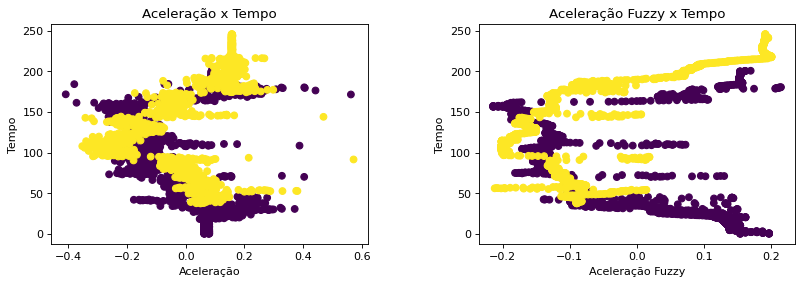

In [49]:
# Gráficos de dispersão pintados pelo voo ('voo_gm'):  
fig = plt.figure(figsize=(12, 8), dpi=80)

# Gráfico 1: Aceleração por Tempo
plt.subplot(2,2,1)
plt.scatter(x=dados_voo['aceleracao'], y=dados_voo['time'], c=dados_voo['voo_gm'])
plt.title('Aceleração x Tempo')
plt.xlabel('Aceleração')
plt.ylabel('Tempo')

# Gráfico 2: Aceleração Fuzzy por Tempo
plt.subplot(2,2,2)
plt.scatter(x=dados_voo['a_fuzzy'], y=dados_voo['time'], c=dados_voo['voo_gm'])
plt.title('Aceleração Fuzzy x Tempo')
plt.xlabel('Aceleração Fuzzy')
plt.ylabel('Tempo')

plt.subplots_adjust(wspace = 0.35)